# modual 1 (Data collation)

In [20]:
# Requests allows us to make HTTP requests which we will use to get data from an API
import requests
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Datetime is a library that allows us to represent dates
import datetime

# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

In [21]:
# Takes the dataset and uses the rocket column to call the API and append the data to the list
def getBoosterVersion(data):
    for x in data['rocket']:
       if x:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

In [22]:
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
       if x:
         response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchSite.append(response['name'])

In [23]:
# Takes the dataset and uses the payloads column to call the API and append the data to the lists
def getPayloadData(data):
    for load in data['payloads']:
       if load:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

In [24]:
# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [25]:
spacex_url="https://api.spacexdata.com/v4/launches/past"

In [26]:
response = requests.get(spacex_url)

In [46]:
#print(response.content)

In [28]:
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

In [29]:
response=requests.get(static_json_url)

In [30]:
response.status_code

200

In [32]:
import json
results = json.loads(response.text)

In [38]:
data=pd.DataFrame(results)

In [39]:
data.head(3)

,fairings,links,static_fire_date_utc,static_fire_date_unix,tbd,net,window,rocket,success,details,crew,ships,capsules,payloads,launchpad,auto_update,failures,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,id
0,"{'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}","{'patch': {'small': 'https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png', 'large': 'https://images2.imgbox.com/40/e3/GypSkayF_o.png'}, 'reddit': {'campaign': None, 'launch': None, 'media': None, 'recovery': None}, 'flickr': {'small': [], 'original': []}, 'presskit': None, 'webcast': 'https://www.youtube.com/watch?v=0a_00nJ_Y88', 'youtube_id': '0a_00nJ_Y88', 'article': 'https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html', 'wikipedia': 'https://en.wikipedia.org/wiki/DemoSat'}",2006-03-17T00:00:00.000Z,1.142554e+09,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,True,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cd9ffd86e000604b32a
1,"{'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}","{'patch': {'small': 'https://images2.imgbox.com/4f/e3/I0lkuJ2e_o.png', 'large': 'https://images2.imgbox.com/be/e7/iNqsqVYM_o.png'}, 'reddit': {'campaign': None, 'launch': None, 'media': None, 'recovery': None}, 'flickr': {'small': [], 'original': []}, 'presskit': None, 'webcast': 'https://www.youtube.com/watch?v=Lk4zQ2wP-Nc', 'youtube_id': 'Lk4zQ2wP-Nc', 'article': 'https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html', 'wikipedia': 'https://en.wikipedia.org/wiki/DemoSat'}",None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,"Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,True,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]",2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cdaffd86e000604b32b
2,"{'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}","{'patch': {'small': 'https://images2.imgbox.com/3d/86/cnu0pan8_o.png', 'large': 'https://images2.imgbox.com/4b/bd/d8UxLh4q_o.png'}, 'reddit': {'campaign': None, 'launch': None, 'media': None, 'recovery': None}, 'flickr': {'small': [], 'original': []}, 'presskit': None, 'webcast': 'https://www.youtube.com/watch?v=v0w9p3U8860', 'youtube_id': 'v0w9p3U8860', 'article': 'http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary', 'wikipedia': 'https://en.wikipedia.org/wiki/Trailblazer_(satellite)'}",None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,True,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cdbffd86e000604b32c


In [40]:
# Lets take a subset of our dataframe keeping only the features we want and the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]

In [41]:
data.head()

,rocket,payloads,launchpad,cores,flight_number,date_utc,date
0,5e9d0d95eda69955f709d1eb,5eb0e4b5b6c3bb0006eeb1e1,5e9e4502f5090995de566f86,"{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",1,2006-03-24T22:30:00.000Z,2006-03-24
1,5e9d0d95eda69955f709d1eb,5eb0e4b6b6c3bb0006eeb1e2,5e9e4502f5090995de566f86,"{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",2,2007-03-21T01:10:00.000Z,2007-03-21
3,5e9d0d95eda69955f709d1eb,5eb0e4b7b6c3bb0006eeb1e5,5e9e4502f5090995de566f86,"{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",4,2008-09-28T23:15:00.000Z,2008-09-28
4,5e9d0d95eda69955f709d1eb,5eb0e4b7b6c3bb0006eeb1e6,5e9e4502f5090995de566f86,"{'core': '5e9e289ef359184f103b2627', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",5,2009-07-13T03:35:00.000Z,2009-07-13
5,5e9d0d95eda69973a809d1ec,5eb0e4b7b6c3bb0006eeb1e7,5e9e4501f509094ba4566f84,"{'core': '5e9e289ef359185f2b3b2628', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",6,2010-06-04T18:45:00.000Z,2010-06-04


In [42]:
#Global variables 
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

In [43]:
BoosterVersion

[]

In [44]:
# Call getBoosterVersion
getBoosterVersion(data)

In [45]:
BoosterVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

In [47]:
# Call getLaunchSite
getLaunchSite(data)

In [48]:
# Call getPayloadData
getPayloadData(data)

In [49]:
# Call getCoreData
getCoreData(data)

In [50]:
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}


In [52]:
new_data=pd.DataFrame(launch_dict)

In [53]:
new_data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


In [69]:
data_falcon9 = new_data[new_data["BoosterVersion"]=="Falcon 9"]

In [126]:
data_falcon9

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,8,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,10,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,11,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,12,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,102,2020-09-03,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058
90,103,2020-10-06,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058
91,104,2020-10-18,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058
92,105,2020-10-24,Falcon 9,15600.000000,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857


In [71]:
data_falcon9.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [72]:
mean_of_PayloadMass=data_falcon9["PayloadMass"].mean()     
mean_of_PayloadMass

6123.547647058824

In [73]:
data_falcon9["PayloadMass"].replace(to_replace=np.nan, value=mean_of_PayloadMass, inplace=True)

C:\Users\isame\AppData\Local\Temp\ipykernel_23256\980975826.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_falcon9["PayloadMass"].replace(to_replace=np.nan, value=mean_of_PayloadMass, inplace=True)
C:\Users\isame\AppData\Local\Temp\ipykernel_23256\980975826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_falcon9["PayloadMass

In [74]:
data_falcon9.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [ ]:
#data_falcon9.to_csv('dataset_part_1.csv', index=False)    لا بغيت احفظها بالجهاز

# part 2

In [75]:
import sys

import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd

In [76]:
def date_time(table_cells):
    """
    This function returns the data and time from the HTML  table cell
    Input: the  element of a table data cell extracts extra row
    """
    return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

def booster_version(table_cells):
    """
    This function returns the booster version from the HTML  table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=''.join([booster_version for i,booster_version in enumerate( table_cells.strings) if i%2==0][0:-1])
    return out

def landing_status(table_cells):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=[i for i in table_cells.strings][0]
    return out


def get_mass(table_cells):
    mass=unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find("kg")
        new_mass=mass[0:mass.find("kg")+2]
    else:
        new_mass=0
    return new_mass


def extract_column_from_header(row):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()
        
    colunm_name = ' '.join(row.contents)
    
    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name    


In [77]:
static_url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"

In [80]:
data = requests.get(static_url).text


In [81]:
soup = BeautifulSoup(data, "html.parser")

In [82]:
soup.title

<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>

In [84]:
html_tables = soup.find_all('table') # in html table is represented by the tag <table>

In [125]:
# Let's print the third table and check its content
first_launch_table = html_tables[2]
#print(first_launch_table)

In [111]:
 
ths = first_launch_table.find_all('th')

column_names = []

# Iterate through each <th> element
for th in ths:
    name = extract_column_from_header(th)
    if name is not None and len(name) > 0: 
        column_names.append(name)


In [112]:
print(column_names)

['Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome']


In [115]:
launch_dict= dict.fromkeys(column_names)

# Remove an irrelvant column
del launch_dict['Date and time ( )']

# Let's initial the launch_dict with each value to be an empty list
launch_dict['Flight No.'] = []
launch_dict['Launch site'] = []
launch_dict['Payload'] = []
launch_dict['Payload mass'] = []
launch_dict['Orbit'] = []
launch_dict['Customer'] = []
launch_dict['Launch outcome'] = []
# Added some new columns
launch_dict['Version Booster']=[]
launch_dict['Booster landing']=[]
launch_dict['Date']=[]
launch_dict['Time']=[]

In [116]:

launch_dict

{'Flight No.': [],
 'Launch site': [],
 'Payload': [],
 'Payload mass': [],
 'Orbit': [],
 'Customer': [],
 'Launch outcome': [],
 'Version Booster': [],
 'Booster landing': [],
 'Date': [],
 'Time': []}

In [107]:
extracted_row = 0
#Extract each table 
for table_number,table in enumerate(soup.find_all('table',"wikitable plainrowheaders collapsible")):
   # get table row 
    for rows in table.find_all("tr"):
        #check to see if first table heading is as number corresponding to launch a number 
        if rows.th:
            if rows.th.string:
                flight_number=rows.th.string.strip()
                flag=flight_number.isdigit()
        else:
            flag=False
        #get table element 
        row=rows.find_all('td')
        #if it is number save cells in a dictonary 
        if flag:
            extracted_row += 1
            # Flight Number value
            # TODO: Append the flight_number into launch_dict with key `Flight No.`
            #print(flight_number)
            datatimelist=date_time(row[0])
            
            # Date value
            # TODO: Append the date into launch_dict with key `Date`
            date = datatimelist[0].strip(',')
            #print(date)
            
            # Time value
            # TODO: Append the time into launch_dict with key `Time`
            time = datatimelist[1]
            #print(time)
              
            # Booster version
            # TODO: Append the bv into launch_dict with key `Version Booster`
            bv=booster_version(row[1])
            if not(bv):
                bv=row[1].a.string
            print(bv)
            
            # Launch Site
            # TODO: Append the bv into launch_dict with key `Launch Site`
            launch_site = row[2].a.string
            #print(launch_site)
            
            # Payload
            # TODO: Append the payload into launch_dict with key `Payload`
            payload = row[3].a.string
            #print(payload)
            
            # Payload Mass
            # TODO: Append the payload_mass into launch_dict with key `Payload mass`
            payload_mass = get_mass(row[4])
            #print(payload)
            
            # Orbit
            # TODO: Append the orbit into launch_dict with key `Orbit`
            orbit = row[5].a.string
            #print(orbit)
            
            # Customer
            # TODO: Append the customer into launch_dict with key `Customer`
            customer = row[6].a.string
            #print(customer)
            
            # Launch outcome
            # TODO: Append the launch_outcome into launch_dict with key `Launch outcome`
            launch_outcome = list(row[7].strings)[0]
            #print(launch_outcome)
            
            # Booster landing
            # TODO: Append the launch_outcome into launch_dict with key `Booster landing`
            booster_landing = landing_status(row[8])
            #print(booster_landing)
            

F9 v1.07B0003.18
F9 v1.07B0004.18
F9 v1.07B0005.18
F9 v1.07B0006.18
F9 v1.07B0007.18
F9 v1.17B10038
F9 v1.1
F9 v1.1
F9 v1.1
F9 v1.1
F9 v1.1
F9 v1.1[
F9 v1.1[
F9 v1.1[
F9 v1.1[
F9 v1.1[
F9 v1.1[
F9 v1.1[
F9 v1.1[
F9 FT[
F9 v1.1[
F9 FT[
F9 FT[
F9 FT[
F9 FT[
F9 FT[
F9 FT[
F9 FT[
F9 FT[
F9 FT[
F9 FT[
F9 FT♺[
F9 FT[
F9 FT[
F9 FT[
F9 FTB1029.2195
F9 FT[
F9 FT[
F9 B4[
F9 FT[
F9 B4[
F9 B4[
F9 FTB1031.2220
F9 B4[
F9 FTB1035.2227
F9 FTB1036.2227
F9 B4[
F9 FTB1032.2245
F9 FTB1038.2268
F9 B4[
F9 B4B1041.2268
F9 B4B1039.2292
F9 B4[
F9 B5311B1046.1268
F9 B4B1043.2322
F9 B4B1040.2268
F9 B4B1045.2336
F9 B5
F9 B5349B1048[
F9 B5B1046.2354
F9 B5[
F9 B5B1048.2364
F9 B5B1047.2268
F9 B5B1046.3268
F9 B5[
F9 B5[
F9 B5B1049.2397
F9 B5B1048.3399
F9 B5[]413
F9 B5[
F9 B5B1049.3434
F9 B5B1051.2420
F9 B5B1056.2465
F9 B5B1047.3472
F9 B5
F9 B5[
F9 B5B1056.3482
F9 B5
F9 B5
F9 B5
F9 B5
F9 B5
F9 B5
F9 B5
F9 B5[
F9 B5
F9 B5
F9 B5
F9 B5B1058.2544
F9 B5
F9 B5B1049.6544
F9 B5
F9 B5B1060.2563
F9 B5B1058.3565
F9 B5B1051.6568


AttributeError: 'NoneType' object has no attribute 'string'

In [108]:
df= pd.DataFrame({ key:pd.Series(value) for key, value in launch_dict.items() })

In [109]:
df.head()

,Flight No.,Launch site,Payload,Payload mass,Orbit,Customer,Launch outcome,Version Booster,Booster landing,Date,Time


In [122]:
import pandas as pd

extracted_row = 0
launch_dict = {
    "Flight No.": [],
    "Date": [],
    "Time": [],
    "Version Booster": [],
    "Launch Site": [],
    "Payload": [],
    "Payload Mass": [],
    "Orbit": [],
    "Customer": [],
    "Launch Outcome": [],
    "Booster Landing": []
}

# Extract each table
for table_number, table in enumerate(soup.find_all('table', "wikitable plainrowheaders collapsible")):
    # Get table row
    for rows in table.find_all("tr"):
        # Check to see if the first table heading is a number corresponding to the launch number
        if rows.th:
            if rows.th.string:
                flight_number = rows.th.string.strip()
                flag = flight_number.isdigit()
        else:
            flag = False
        
        # Get table element
        row = rows.find_all('td')
        
        # If it is a number, save cells in a dictionary
        if flag:
            extracted_row += 1
            
            # Flight Number value
            launch_dict["Flight No."].append(flight_number)
            
            # Date and Time values
            datatimelist = date_time(row[0])
            date = datatimelist[0].strip(',') if datatimelist else None
            time = datatimelist[1] if len(datatimelist) > 1 else None
            launch_dict["Date"].append(date)
            launch_dict["Time"].append(time)
            
            # Booster version
            bv = booster_version(row[1])
            if not bv:
                bv = row[1].a.string if row[1].a else None
            launch_dict["Version Booster"].append(bv)
            
            # Launch Site
            launch_site = row[2].a.string if row[2].a else None
            launch_dict["Launch Site"].append(launch_site)
            
            # Payload
            payload = row[3].a.string if row[3].a else None
            launch_dict["Payload"].append(payload)
            
            # Payload Mass
            payload_mass = get_mass(row[4])
            launch_dict["Payload Mass"].append(payload_mass)
            
            # Orbit
            orbit = row[5].a.string if row[5].a else None
            launch_dict["Orbit"].append(orbit)
            
            # Customer
            customer = row[6].a.string if row[6].a else None
            launch_dict["Customer"].append(customer)
            
            # Launch Outcome
            launch_outcome = list(row[7].strings)[0] if row[7].strings else None
            launch_dict["Launch Outcome"].append(launch_outcome)
            
            # Booster landing
            booster_landing = landing_status(row[8])
            launch_dict["Booster Landing"].append(booster_landing)

# Convert launch_dict to a DataFrame
df = pd.DataFrame(launch_dict)

# Display the DataFrame
print(df)


    Flight No.             Date   Time   Version Booster Launch Site  \
0            1      4 June 2010  18:45  F9 v1.07B0003.18       CCAFS   
1            2  8 December 2010  15:43  F9 v1.07B0004.18       CCAFS   
2            3      22 May 2012  07:44  F9 v1.07B0005.18       CCAFS   
3            4   8 October 2012  00:35  F9 v1.07B0006.18       CCAFS   
4            5     1 March 2013  15:10  F9 v1.07B0007.18       CCAFS   
..         ...              ...    ...               ...         ...   
116        117       9 May 2021  06:42  F9 B5B1051.10657       CCSFS   
117        118      15 May 2021  22:56   F9 B5B1058.8660         KSC   
118        119      26 May 2021  18:59   F9 B5B1063.2665       CCSFS   
119        120      3 June 2021  17:29   F9 B5B1067.1668         KSC   
120        121      6 June 2021  04:26             F9 B5       CCSFS   

                                  Payload Payload Mass Orbit   Customer  \
0    Dragon Spacecraft Qualification Unit            0   LEO

In [123]:
df= pd.DataFrame({ key:pd.Series(value) for key, value in launch_dict.items() })

In [124]:
df.head()

,Flight No.,Date,Time,Version Booster,Launch Site,Payload,Payload Mass,Orbit,Customer,Launch Outcome,Booster Landing
0,1,4 June 2010,18:45,F9 v1.07B0003.18,CCAFS,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success\n,Failure
1,2,8 December 2010,15:43,F9 v1.07B0004.18,CCAFS,Dragon,0,LEO,NASA,Success,Failure
2,3,22 May 2012,07:44,F9 v1.07B0005.18,CCAFS,Dragon,525 kg,LEO,NASA,Success,No attempt\n
3,4,8 October 2012,00:35,F9 v1.07B0006.18,CCAFS,SpaceX CRS-1,"4,700 kg",LEO,NASA,Success\n,No attempt
4,5,1 March 2013,15:10,F9 v1.07B0007.18,CCAFS,SpaceX CRS-2,"4,877 kg",LEO,NASA,Success\n,No attempt\n


# part 3

In [128]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


In [130]:
df.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [131]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [132]:
df['LaunchSite'].value_counts() 

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

In [133]:
df['Orbit'].value_counts() 

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64

In [134]:
landing_outcomes = df['Outcome'].value_counts()
landing_outcomes

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

In [135]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [136]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [143]:
landing_class=[]
for i in df['Outcome']:
    if i in bad_outcomes:
        landing_class.append(0)
    else:
        landing_class.append(1)

In [148]:
df['Class']=landing_class

In [149]:
df.head(8)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1


In [150]:
df["Class"].mean()

0.6666666666666666

# Modual 2

In [154]:
%load_ext sql

In [155]:
import csv, sqlite3
import prettytable
prettytable.DEFAULT = 'DEFAULT'

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [156]:
%sql sqlite:///my_data1.db

In [157]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

In [158]:
#DROP THE TABLE IF EXISTS

%sql DROP TABLE IF EXISTS SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


[]

In [159]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

In [161]:
%sql SELECT * FROM SPACEXTABLE limit 5

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [165]:
%sql SELECT DISTINCT Launch_Site FROM SPACEXTABLE #task1

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


In [182]:
%%sql
SELECT *
FROM SPACEXTABLE
WHERE launch_site LIKE 'CCA%'
LIMIT 10;

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt
2013-12-03,22:41:00,F9 v1.1,CCAFS LC-40,SES-8,3170,GTO,SES,Success,No attempt
2014-01-06,22:06:00,F9 v1.1,CCAFS LC-40,Thaicom 6,3325,GTO,Thaicom,Success,No attempt
2014-04-18,19:25:00,F9 v1.1,CCAFS LC-40,SpaceX CRS-3,2296,LEO (ISS),NASA (CRS),Success,Controlled (ocean)
2014-07-14,15:15:00,F9 v1.1,CCAFS LC-40,OG2 Mission 1 6 Orbcomm-OG2 satellites,1316,LEO,Orbcomm,Success,Controlled (ocean)
2014-08-05,8:00:00,F9 v1.1,CCAFS LC-40,AsiaSat 8,4535,GTO,AsiaSat,Success,No attempt


In [172]:
%%sql
SELECT SUM(	PAYLOAD_MASS__KG_) AS total_payload_mass
FROM SPACEXTABLE
WHERE Customer = "NASA (CRS)";

 * sqlite:///my_data1.db
Done.


total_payload_mass
45596


In [175]:
%%sql
SELECT AVG(	PAYLOAD_MASS__KG_) AS total_payload_mass
FROM SPACEXTABLE
WHERE Booster_Version = "F9 v1.1";

 * sqlite:///my_data1.db
Done.


total_payload_mass
2928.4


In [181]:
%%sql
SELECT MIN(Date) AS first_successful_landing_date
FROM SPACEXTABLE
WHERE Landing_Outcome = 'Success (ground pad)' ;

 * sqlite:///my_data1.db
Done.


first_successful_landing_date
2015-12-22


In [188]:
%%sql
SELECT Booster_Version
FROM SPACEXTABLE
WHERE 4000< PAYLOAD_MASS__KG_	<6000  and Landing_Outcome="Success (drone ship)"

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 FT B1021.1
F9 FT B1022
F9 FT B1023.1
F9 FT B1026
F9 FT B1029.1
F9 FT B1021.2
F9 FT B1029.2
F9 FT B1036.1
F9 FT B1038.1
F9 B4 B1041.1


In [189]:
%%sql
SELECT Mission_Outcome, COUNT(*) AS total_missions
FROM SPACEXTABLE
GROUP BY Mission_Outcome;

 * sqlite:///my_data1.db
Done.


Mission_Outcome,total_missions
Failure (in flight),1
Success,98
Success,1
Success (payload status unclear),1


In [190]:
%%sql
SELECT Booster_Version
FROM SPACEXTABLE
WHERE PAYLOAD_MASS__KG_ = (
    SELECT MAX(PAYLOAD_MASS__KG_)
    FROM SPACEXTABLE
);


 * sqlite:///my_data1.db
Done.


Booster_Version
F9 B5 B1048.4
F9 B5 B1049.4
F9 B5 B1051.3
F9 B5 B1056.4
F9 B5 B1048.5
F9 B5 B1051.4
F9 B5 B1049.5
F9 B5 B1060.2
F9 B5 B1058.3
F9 B5 B1051.6


In [192]:
%%sql
SELECT 
    strftime('%m', Date) AS Month_Number,
    strftime('%Y', Date) AS Year,
    Landing_Outcome ,
    Booster_Version,
    Launch_Site
FROM SPACEXTABLE
WHERE Landing_Outcome = 'Failure (drone ship)'
  AND strftime('%Y', Date) = '2015';

 * sqlite:///my_data1.db
Done.


Month_Number,Year,Landing_Outcome,Booster_Version,Launch_Site
01,2015,Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40
04,2015,Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40


In [194]:
%%sql
SELECT 
    Landing_Outcome,
    COUNT(*) AS Outcome_Count
FROM SPACEXTABLE
WHERE Date BETWEEN '2010-06-04' AND '2017-03-20'
GROUP BY Landing_Outcome
ORDER BY Outcome_Count DESC;

 * sqlite:///my_data1.db
Done.


Landing_Outcome,Outcome_Count
No attempt,10
Success (drone ship),5
Failure (drone ship),5
Success (ground pad),3
Controlled (ocean),3
Uncontrolled (ocean),2
Failure (parachute),2
Precluded (drone ship),1


In [195]:
%%sql
SELECT *
FROM SPACEXTABLE LIMIT 5

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


# modual 2 part 2

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df=pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


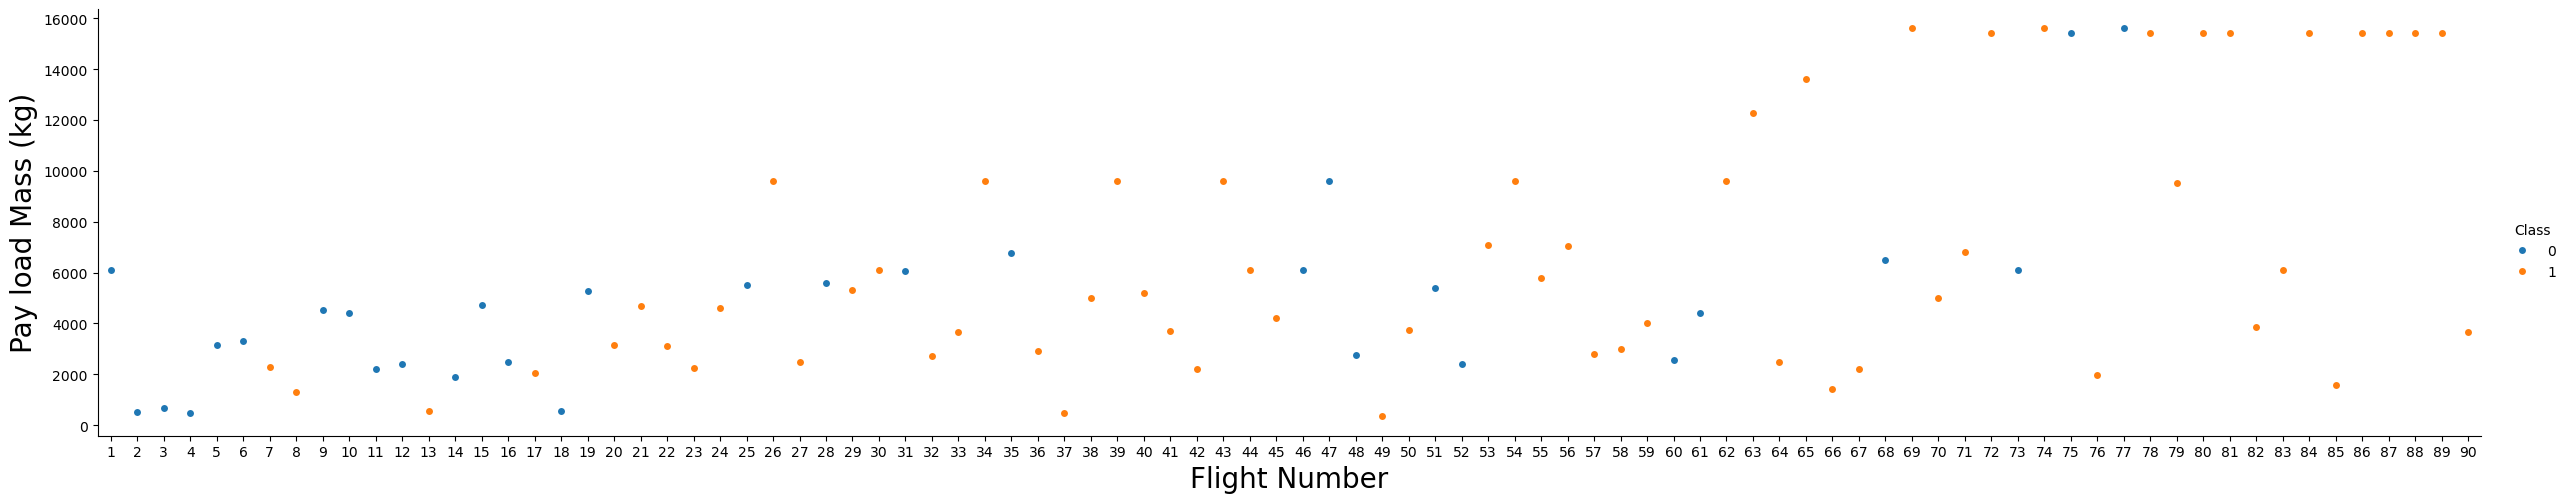

In [202]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

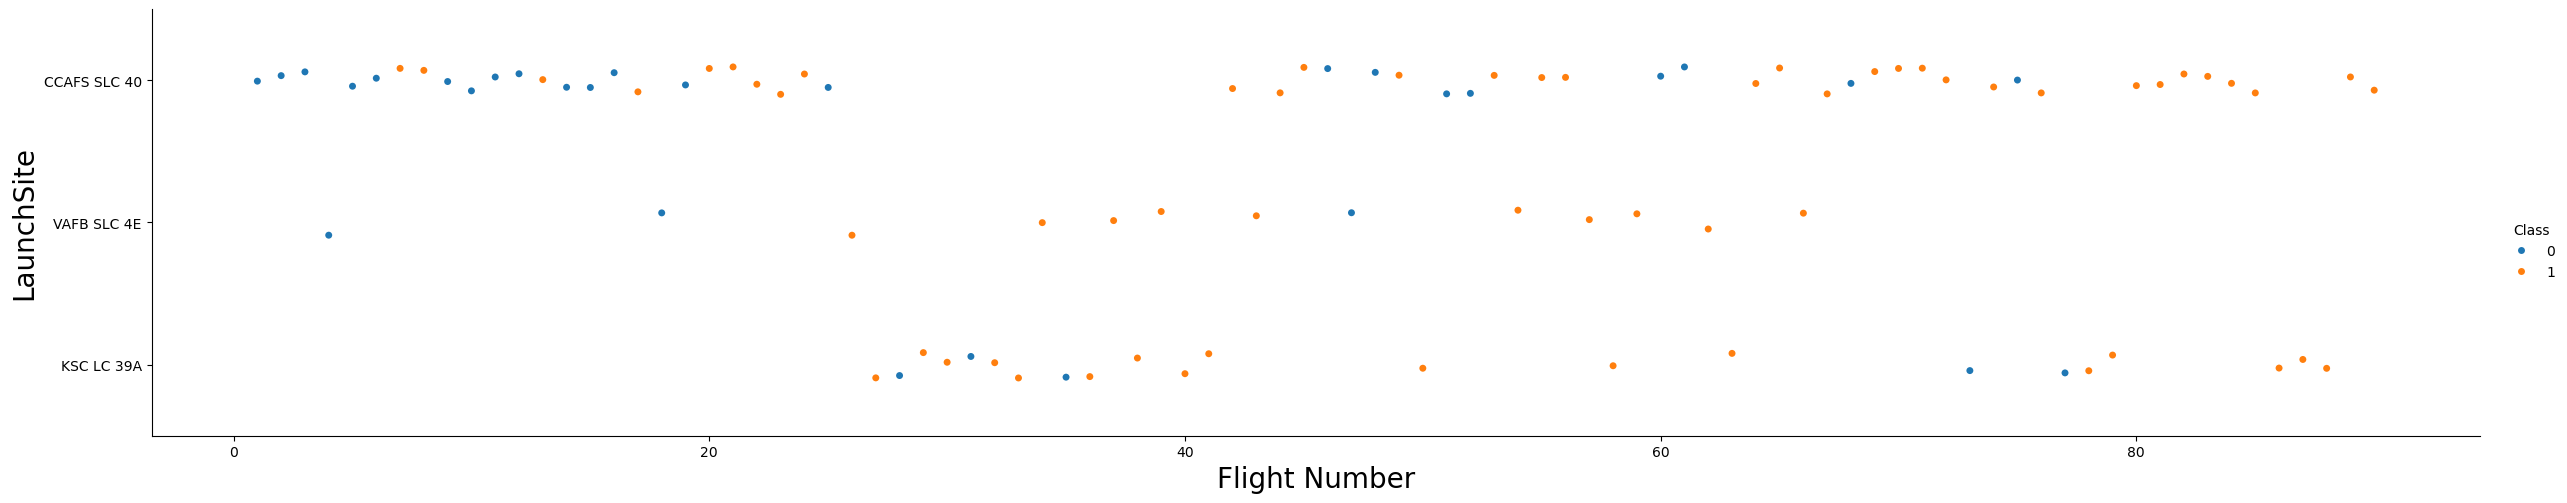

In [201]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

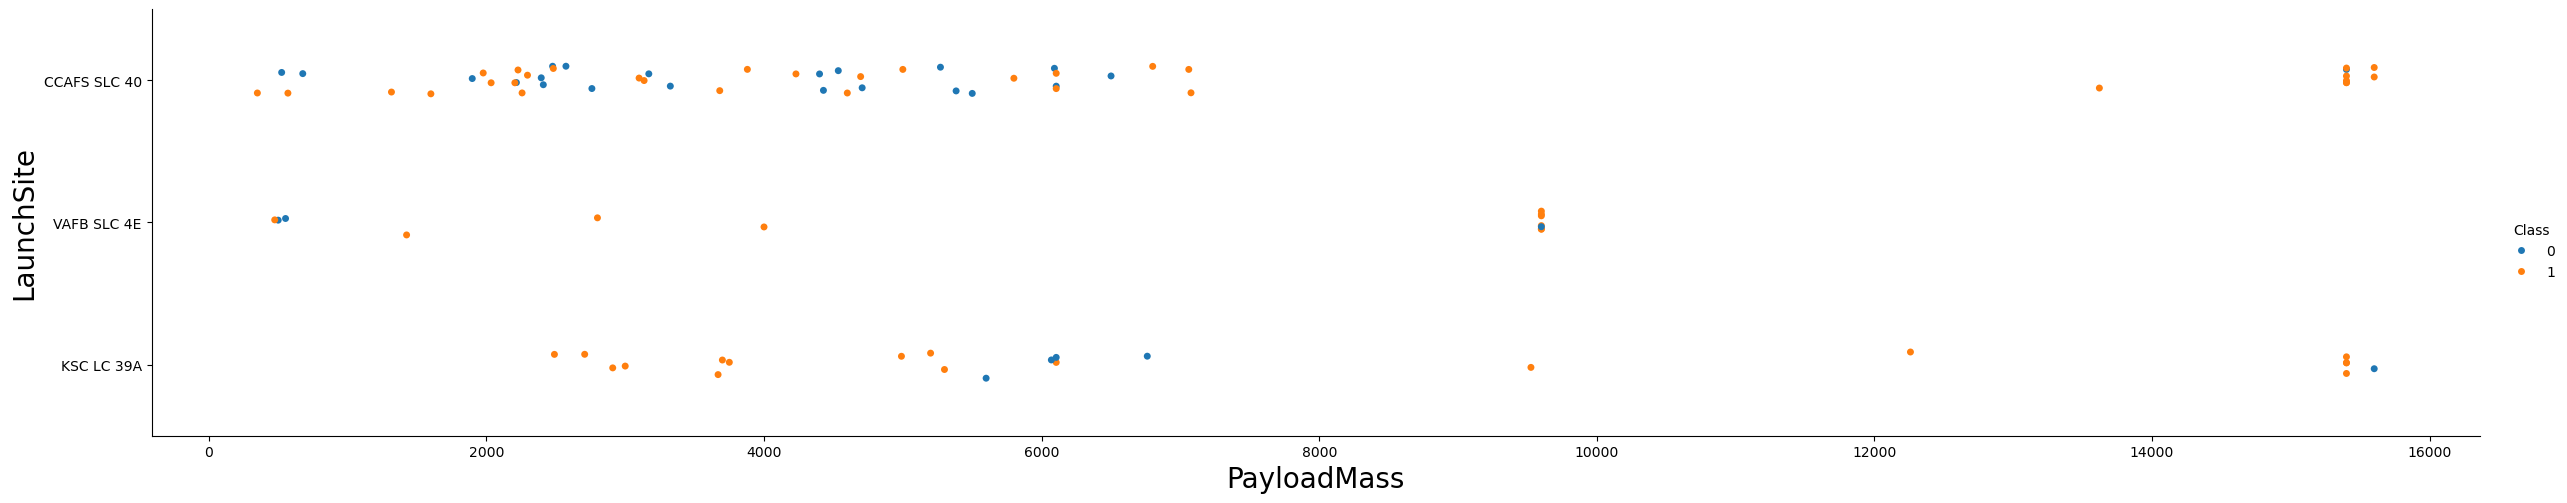

In [203]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

In [205]:
grouped = df.groupby('Orbit')['Class'].mean()


<Axes: xlabel='Orbit'>

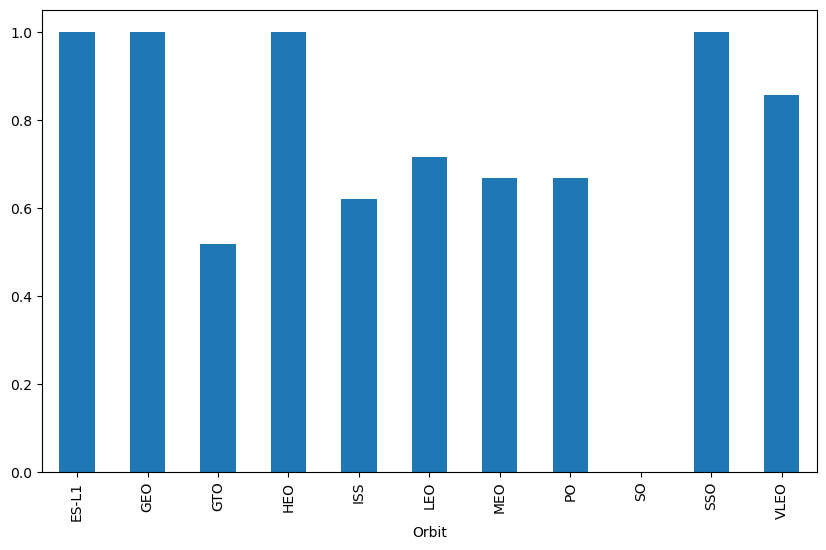

In [209]:
grouped.plot(kind='bar', figsize=(10, 6))

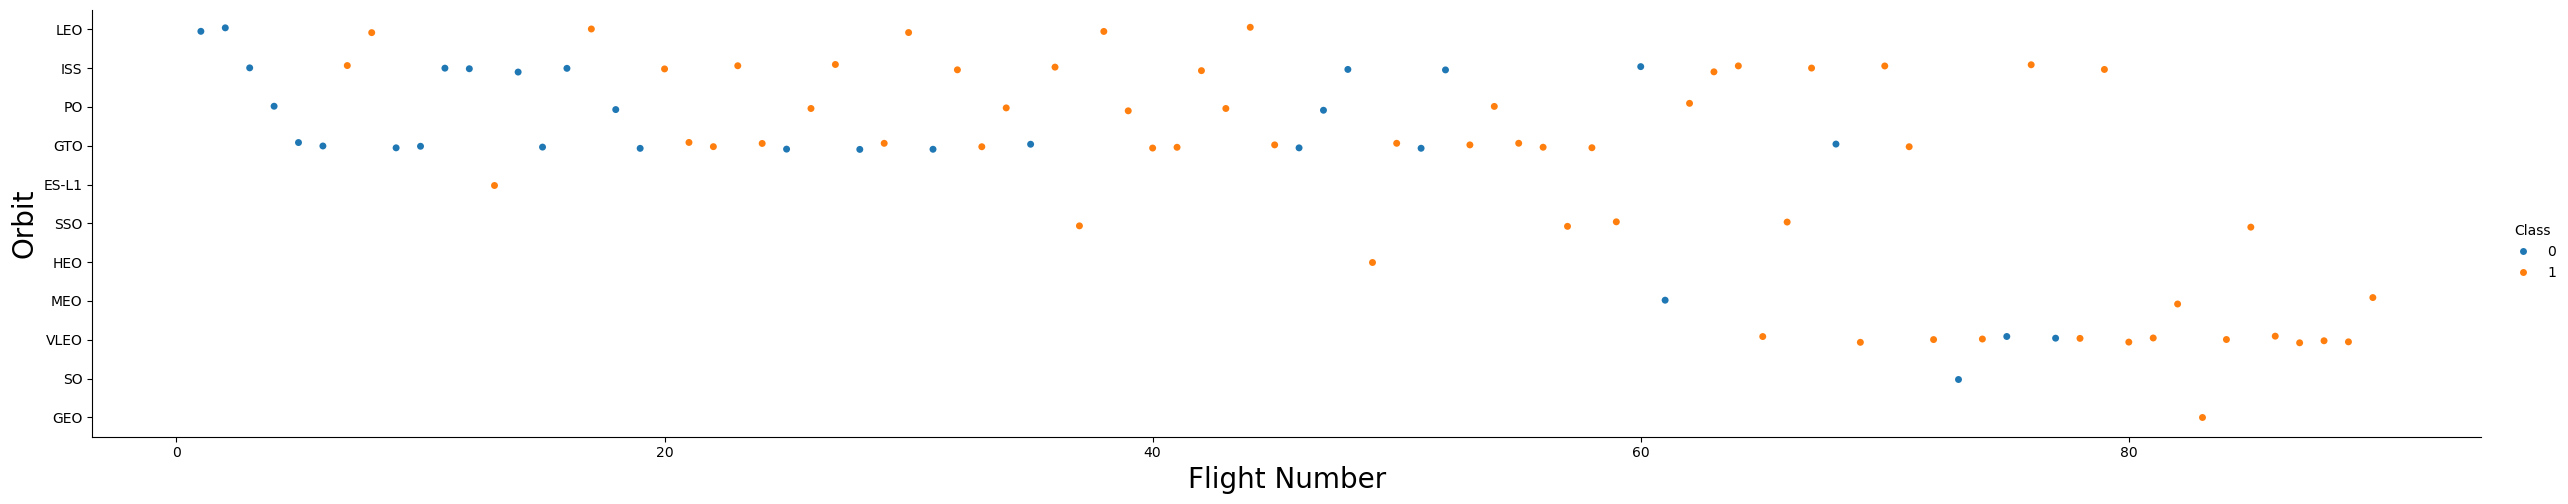

In [211]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

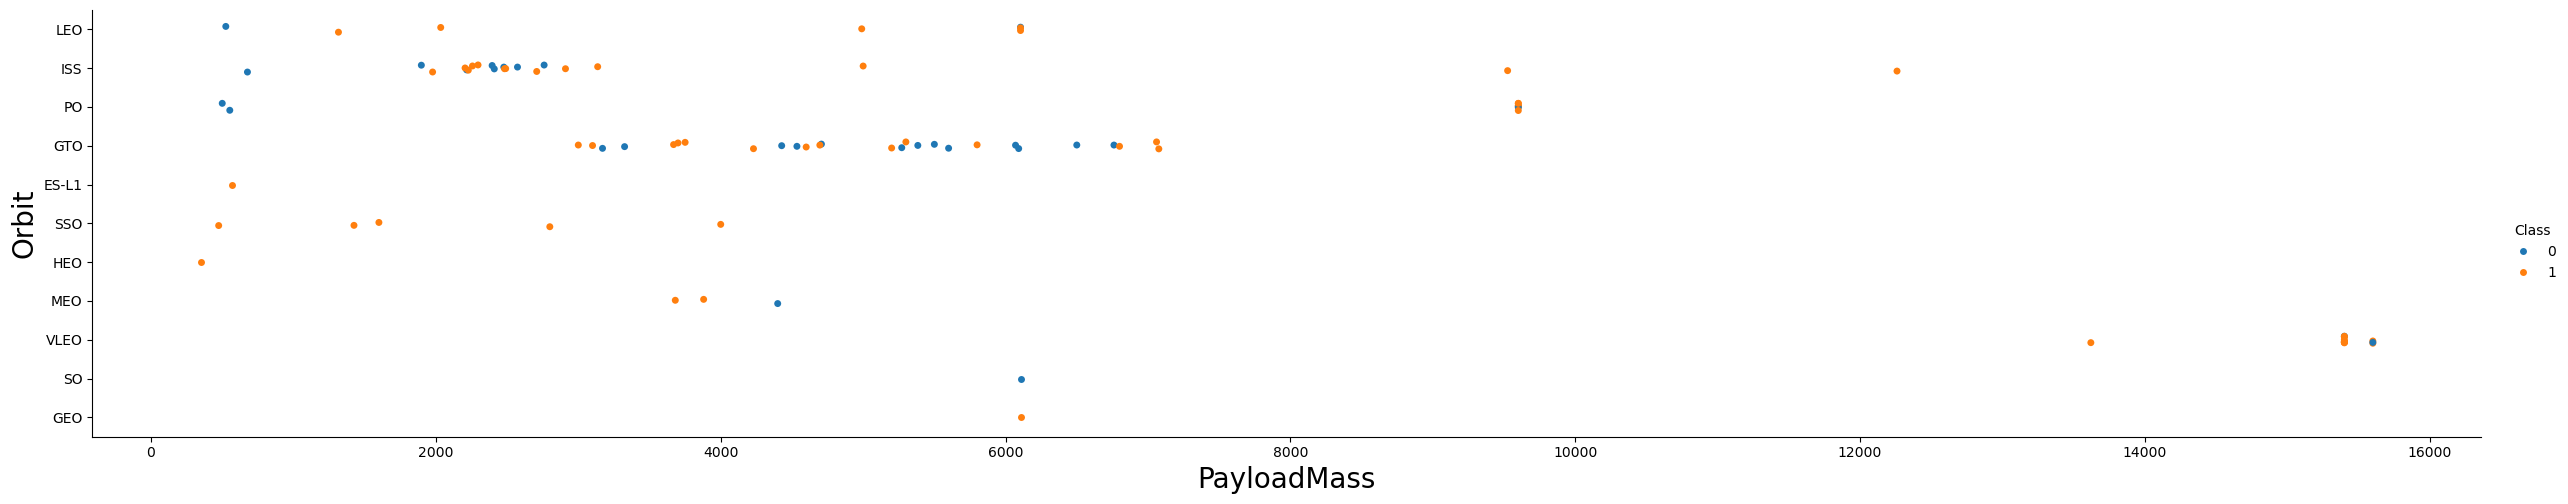

In [212]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

In [213]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


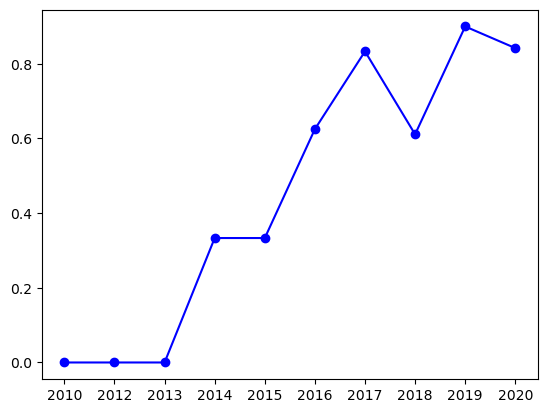

In [221]:
success_trend = df.groupby('Date')['Class'].mean().reset_index()

# Plot the line chart
plt.plot(success_trend['Date'], success_trend['Class'], marker='o', color='blue', label='Avg Success Rate')


In [222]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [231]:
features_one_hot =  pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [233]:
features_one_hot=features_one_hot.astype(float)

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

In [235]:
features_one_hot.shape

(90, 80)

# modual 3

In [236]:
import folium

In [237]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

In [239]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'
spacex_df=pd.read_csv(URL)
spacex_df.head()

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.0,LEO,SpaceX,Failure (parachute),0,28.562302,-80.577356
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouère cheese",0.0,LEO (ISS),NASA (COTS) NRO,Failure (parachute),0,28.562302,-80.577356
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525.0,LEO (ISS),NASA (COTS),No attempt,0,28.562302,-80.577356
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356


In [304]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


In [322]:
coordinate=[28.562302, -80.577356]
coordinate2=[28.563197, -80.576820]
coordinate3=[28.573255, -80.646895]
coordinate4=[34.632834, -120.610745]

In [305]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map1 = folium.Map(location=nasa_coordinate, zoom_start=10)

In [306]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center2'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map1.add_child(circle)
site_map1.add_child(marker)

In [316]:
site_map2 = folium.Map(location=coordinate, zoom_start=10)
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle1 = folium.Circle(coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('CCAFS LC-40'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker1 = folium.map.Marker(
    coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % '	CCAFS LC-40',
        )
    )
site_map2.add_child(circle1)
site_map2.add_child(marker1)

In [317]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle1 = folium.Circle(coordinate2, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('CCAFS SLC-40'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker1 = folium.map.Marker(
    coordinate2,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'CCAFS SLC-40',
        )
    )
site_map2.add_child(circle1)
site_map2.add_child(marker1)

In [320]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle1 = folium.Circle(coordinate3, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('KSC LC-39A'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker1 = folium.map.Marker(
    coordinate3,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'KSC LC-39A',
        )
    )
site_map2.add_child(circle1)
site_map2.add_child(marker1)

In [324]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle1 = folium.Circle(coordinate4, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('VAFB SLC-4E'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker1 = folium.map.Marker(
    coordinate4,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'VAFB SLC-4E',
        )
    )
site_map2.add_child(circle1)
site_map2.add_child(marker1)

In [325]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


In [326]:
marker_cluster = MarkerCluster()

In [342]:
spacex_df["marker_color"] = spacex_df["class"].apply(lambda x: "green" if x == 1 else "red")

In [344]:
spacex_df.head(5)

,Launch Site,Lat,Long,class,marker_color
0,CCAFS LC-40,28.562302,-80.577356,0,red
1,CCAFS LC-40,28.562302,-80.577356,0,red
2,CCAFS LC-40,28.562302,-80.577356,0,red
3,CCAFS LC-40,28.562302,-80.577356,0,red
4,CCAFS LC-40,28.562302,-80.577356,0,red


In [348]:
# Assuming spacex_df has columns: 'Lat', 'Long', 'class', and 'marker_color'

# Initialize the map
site_map = folium.Map(location=[spacex_df['Lat'].mean(), spacex_df['Long'].mean()], zoom_start=5)

# Create a MarkerCluster object
marker_cluster = MarkerCluster()

# Iterate through the DataFrame and add markers
for index, record in spacex_df.iterrows():
    # Create a Marker object with customized icon color
    marker = folium.Marker(
        location=[record['Lat'], record['Long']],  # Use Lat and Long for the location
        icon=folium.Icon(color='white', icon_color=record['marker_color'])  # Customize icon
    )
    # Add the marker to the MarkerCluster
    marker_cluster.add_child(marker)

# Add the MarkerCluster to the site map
site_map.add_child(marker_cluster)

# Display the map
site_map


In [349]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

In [350]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [355]:
# Coordinates of the launch site
launch_site_lat = 28.56342
launch_site_lon = -80.57674

# Coordinates of the closest coastline (example given)
coastline_lat = 28.56401
coastline_lon = -80.56803

# Calculate the distance
distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)

# Create the map centered at the launch site
site_map = folium.Map(location=[launch_site_lat, launch_site_lon], zoom_start=16)

# Add a marker for the closest coastline
coastline_marker = folium.Marker(
    location=[coastline_lat, coastline_lon],
    icon=folium.Icon(color='blue', icon='info-sign'),
    popup='Closest Coastline'
)
site_map.add_child(coastline_marker)

# Add a marker to display the distance using a DivIcon
distance_marker = folium.Marker(
    location=[(launch_site_lat + coastline_lat) / 2, (launch_site_lon + coastline_lon) / 2],
    icon=DivIcon(
        icon_size=(150, 30),
        icon_anchor=(0, 0),
        html=f'<div style="font-size: 12px; color: #d35400;"><b>{distance_coastline:.2f} KM</b></div>'
    )
)
site_map.add_child(distance_marker)

# Add a line connecting the launch site and coastline for better visualization
folium.PolyLine(
    locations=[[launch_site_lat, launch_site_lon], [coastline_lat, coastline_lon]],
    color='blue',
    weight=2,
    opacity=0.8
).add_to(site_map)

# Display the map
site_map

# part 2

In [359]:
wget ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"
df=pd.read_csv(wget)
df.head()

,Unnamed: 0,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
0,0,1,CCAFS LC-40,0,0.0,F9 v1.0 B0003,v1.0
1,1,2,CCAFS LC-40,0,0.0,F9 v1.0 B0004,v1.0
2,2,3,CCAFS LC-40,0,525.0,F9 v1.0 B0005,v1.0
3,3,4,CCAFS LC-40,0,500.0,F9 v1.0 B0006,v1.0
4,4,5,CCAFS LC-40,0,677.0,F9 v1.0 B0007,v1.0


In [361]:
wget= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/spacex_dash_app.py"

In [379]:
df["Launch Site"].unique()

array(['CCAFS LC-40', 'VAFB SLC-4E', 'KSC LC-39A', 'CCAFS SLC-40'],
      dtype=object)

In [394]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# Sample SpaceX data for demonstration
spacex_df = df

# Initialize Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div(
    children=[
        # App title
        html.H1(
            'SpaceX Launch Records Dashboard',
            style={'textAlign': 'center', 'color': '#503D36', 'font-size': 24}
        ),
        # Dropdown for launch site selection
        dcc.Dropdown(
            id='site-dropdown',
            options=[
                {'label': 'All Sites', 'value': 'ALL'},
                {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
                {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
                {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
                {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'}
            ],
            value='ALL',
            placeholder="Select a Launch Site",
            searchable=True
        ),
        # Graph to display pie chart
        dcc.Graph(id='success-pie-chart'),
    ]
)

# Callback to update pie chart based on dropdown selection
@app.callback(
    Output(component_id='success-pie-chart', component_property='figure'),
    Input(component_id='site-dropdown', component_property='value')
)
def update_pie_chart(selected_site):
    if selected_site == 'ALL':
        total_per_site = spacex_df['Launch Site'].value_counts().reset_index()
        total_per_site.columns = ['Launch Site', 'Launch Count']
        fig = px.pie(
            total_per_site,
            names='Launch Site',
            values='Launch Count',
            title='Percentage of Launches for All Sites',
            hole=0.3
        )
    else:
        # Filter data for the selected site
        filtered_df = spacex_df[spacex_df['Launch Site'] == selected_site]
        fig = px.pie(
            filtered_df,
            names='class',
            title=f'Total Success Launches for Site {selected_site}',
            hole=0.3
        )
    return fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


In [400]:
app = dash.Dash(__name__)
min_value=0
max_value=10000
# App layout
app.layout = html.Div(
    children=[
        # App title
        html.H1(
            'SpaceX Launch Records Dashboard',
            style={'textAlign': 'center', 'color': '#503D36', 'font-size': 24}
        ),
      dcc.RangeSlider(
    id='payload-slider',
    min=0,
    max=10000,
    step=1000,
    value=[0, 10000],
    marks={i: f'{i} Kg' for i in range(0, 10001, 1000)},
    tooltip={"placement": "bottom", "always_visible": True}
)
       ,
        # Graph to display pie chart
      
    ]
)
if __name__ == '__main__':
    app.run_server(debug=True)

In [404]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# Sample SpaceX data for demonstration, adding 'Booster Version Category' and 'payload'
spacex_df = df

# Initialize Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div(
    children=[
        # App title
        html.H1(
            'SpaceX Launch Records Dashboard',
            style={'textAlign': 'center', 'color': '#503D36', 'font-size': 24}
        ),
        # Dropdown for launch site selection
        dcc.Dropdown(
            id='site-dropdown',
            options=[
                {'label': 'All Sites', 'value': 'ALL'},
                {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
                {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
                {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
                {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'}
            ],
            value='ALL',
            placeholder="Select a Launch Site",
            searchable=True
        ),
        # RangeSlider for payload selection
        dcc.RangeSlider(
            id='payload-slider',
            min=0,
            max=10000,
            step=1000,
            value=[0, 10000],
            marks={i: f'{i} Kg' for i in range(0, 10001, 1000)},
            tooltip={"placement": "bottom", "always_visible": True}
        ),
        # Scatter plot to display Payload vs Launch Outcome
        dcc.Graph(id='success-payload-scatter-chart'),
    ]
)

# Callback to update the scatter plot based on dropdown selection and payload range
@app.callback(
    Output(component_id='success-payload-scatter-chart', component_property='figure'),
    [
        Input(component_id='site-dropdown', component_property='value'),
        Input(component_id="payload-slider", component_property="value")
    ]
)
def update_scatter_plot(selected_site, payload_range):
    min_payload, max_payload = payload_range
    # Filter data by the selected payload range
    filtered_df = spacex_df[(spacex_df['Payload Mass (kg)'] >= min_payload) & (spacex_df['Payload Mass (kg)'] <= max_payload)]

    if selected_site == 'ALL':
        # Create scatter plot for all sites
        fig = px.scatter(
            filtered_df,
            x='Payload Mass (kg)',
            y='class',
            color='Booster Version Category',
            title=f'Payload vs Launch Outcome for All Sites ({min_payload} - {max_payload} Kg)',
            labels={'payload': 'Payload Mass (kg)', 'class': 'Launch Outcome (0=Failure, 1=Success)'}
        )
    else:
        # Filter data for the selected site
        site_filtered_df = filtered_df[filtered_df['Launch Site'] == selected_site]
        fig = px.scatter(
            site_filtered_df,
            x='Payload Mass (kg)',
            y='class',
            color='Booster Version Category',
            title=f'Payload vs Launch Outcome for {selected_site} ({min_payload} - {max_payload} Kg)',
            labels={'payload': 'Payload Mass (kg)', 'class': 'Launch Outcome (0=Failure, 1=Success)'}
        )

    return fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


# modual 4

In [405]:
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [406]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [409]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data=pd.read_csv(URL1)
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [420]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X=pd.read_csv(URL2)
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [422]:
Y=data["Class"].to_numpy()

In [424]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X.astype(float))

In [427]:
X_train, X_test, Y_train, Y_test= train_test_split( X, Y, test_size=0.2, random_state=2)

In [428]:
Y_test.shape

(18,)

In [465]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

logreg_cv = GridSearchCV(lr, param_grid=parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [435]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [436]:
accuracy = logreg_cv.score(X_test, Y_test)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.8333333333333334


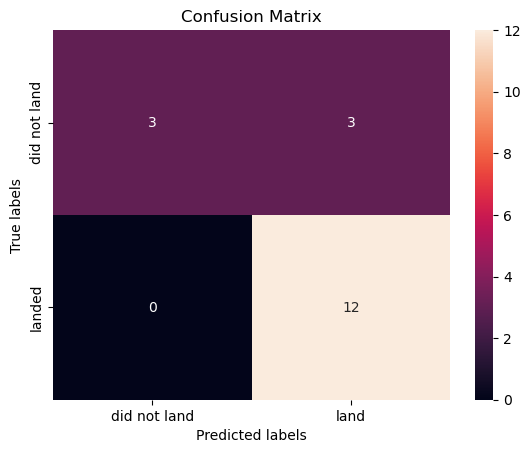

In [437]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [440]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv= GridSearchCV(svm, param_grid=parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [441]:
print("Best Parameters:", svm_cv.best_params_)
print("Best Score:", svm_cv.best_score_)

Best Parameters: {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Best Score: 0.8482142857142856


In [443]:
accuracy = svm_cv.score(X_test, Y_test)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.8333333333333334


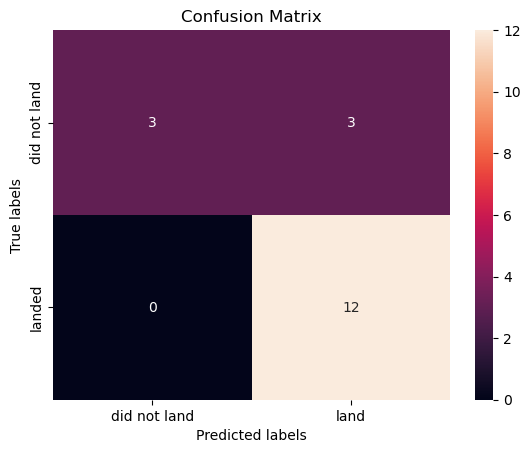

In [444]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [458]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt', 'log2'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv= GridSearchCV(tree, param_grid=parameters, cv=10)
tree_cv.fit(X_train, Y_train) 


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [459]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
accuracy : 0.8892857142857142


In [460]:
accuracy = tree_cv.score(X_test, Y_test)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.7222222222222222


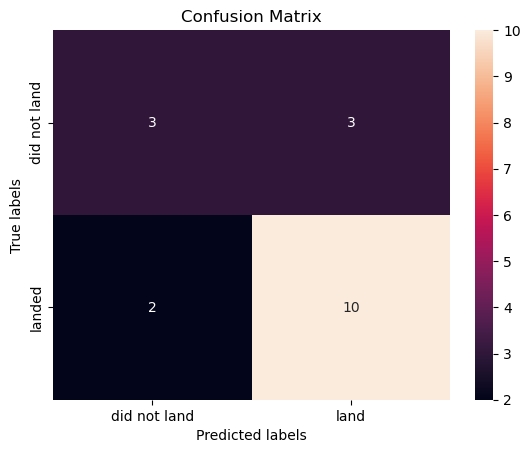

In [461]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [462]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
KNN_cv= GridSearchCV(KNN, param_grid=parameters, cv=10)
KNN_cv.fit(X_train, Y_train) 
print("tuned hpyerparameters :(best parameters) ",KNN_cv.best_params_)
print("accuracy :",KNN_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


In [463]:
accuracy = KNN_cv.score(X_test, Y_test)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.8333333333333334


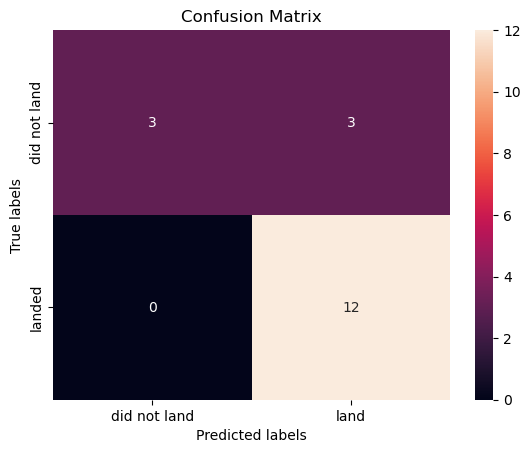

In [464]:
yhat = KNN_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)